# Trabalho Prático - Introdução às Linguagens Estatísticas

# Introdução

A fim de entender melhor o perfil das futuras contratações da Trojan Technologies SA e verificar se o as contrações anteriores seguiam um perfil homogênio, Aquiles contratou um cientista de dados para analisar a base de dados atual da empresa e obter insights e respostas.

# Implementação

Cada linha do arquivo "Perfis.json" possui uma lista de listas (Uma lista dentro de outra lista). Sendo assim foi necessário uma função para realizar a concatenação de cada lista tornando essas listas em apenas uma. 

A função de concatenação recebe como parametro uma coluna do DataFrame. Possui uma lista vazia, a qual será adicionado a concatenação das listas da coluna desejada. É utilizado um laço de repeticação for, o qual possui um index 'i' percorre até o final da "listas" recebida como parâmetro. Após a concatenação a função retorna a lista, inicialmente vazia, qua agora possui o resultado da concateção das listas.

Para limpeza e preparação dos dados, primeiramente foi utilizado o .dropna() para realizar a remoção dos valores nulos pertencentes nas tabelas. Observou-se também que em algumas tabelas, algumas colunas possuia textos antes da informação desejada, confundindo-se então a visualização. Sendo assim, utilizou-se o 'replace' para substituir/retirar o texto ('').

# Perfis

In [251]:
#Importação das bibliotecas que serão utilizadas

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#Base de dados com os perfis dos funcionários atuais da Trojan Technologies
perfis = "Perfis.json"

#Leitura do arquivo
dfPerfis = pd.read_json(perfis)

#Visualização do arquivo
#dfPerfis

#Número de instâncias no DataFrame
dfPerfis.shape

(111, 5)

# Education

In [252]:
#Perfil Education

#Cada linha do arquivo possui uma lista de listas (Uma lista dentro de outra lista). Sendo assim foi necessário uma função para 
#realizar a concatenação de cada lista. Essa concatenação será adicionada na listasEducation. 
#Tornando essas listas em apenas uma.

#Função para concatenação das listas
def concatenaEducation(listas):
    listasEducations = []
    for i in  range(len(listas)):
        #Concatenação
        listasEducations = listasEducations + listas[i]
    return listasEducations

#Chamada da Função concatenaEducation, enviando a coluna 'education'
educationPerfis = pd.DataFrame(concatenaEducation(dfPerfis.education))
#Visualização da tabela Education
educationPerfis.head()



,date,degree,major,school
0,2016 – 2016,"Nome do diploma\nExecutive Education, Innovati...",NaN,Stanford University
1,2007 – 2010,Nome do diploma\nEconomics,Área de estudo\nEconomics,Universidade Federal de Minas Gerais
2,2015 – 2015,Nome do diploma\nMaster of Business Administra...,Área de estudo\nGestão de Negócios,Centro Universitário Newton Paiva
3,2009 – 2012,Nome do diploma\nBacharel em Design de Ambientes,Área de estudo\nDesign de Interiores,Universidade do Estado de Minas Gerais
4,2016 – 2019,Nome do diploma\nBachelor’s Degree,Área de estudo\nComputer Technology/Computer S...,Universidade Federal de Minas Gerais


# Tratamento dos Dados 


In [253]:
#Valores nulos
educationPerfis = educationPerfis.dropna()

#Após concatenação dos dados observou-se que a coluna degree possuia o texto "Nome do diploma\n" antes da informação, 
#confundindo-se então a visualização. Sendo assim, utilizou-se o 'replace' para substituir a frase ('').
educationPerfis = educationPerfis.replace('Nome do diploma\n','',regex=True)

#A mesma situação ocorreu com a coluna 'major', a qual apresentava o texto "Área de estudo\n".
educationPerfis = educationPerfis.replace('Área de estudo\n','',regex=True)

#Após concatenação dos dados observou-se que algumas informações eram iguais porém com a escrita diferente, sendo necessário
#normalizá-las para não influenciarem na contagem da análise
educationPerfis = educationPerfis.replace('Colégio Cotemig','COTEMIG',regex=True)
educationPerfis = educationPerfis.replace('Colégio COTEMIG','COTEMIG',regex=True)
educationPerfis = educationPerfis.replace('Faculdade Cotemig','COTEMIG',regex=True)

educationPerfis = educationPerfis.replace('Centro Universitário de Belo Horizonte - UNI-BH','UNI-BH',regex=True)
educationPerfis = educationPerfis.replace('Uni-BH','UNI-BH',regex=True)

#np.unique(educationPerfis)

#Visualização da tabela Education
#Visualizando apenas as 5 primeiras linhas (.head())
educationPerfis.head()

,date,degree,major,school
1,2007 – 2010,Economics,Economics,Universidade Federal de Minas Gerais
2,2015 – 2015,Master of Business Administration (MBA),Gestão de Negócios,Centro Universitário Newton Paiva
3,2009 – 2012,Bacharel em Design de Ambientes,Design de Interiores,Universidade do Estado de Minas Gerais
4,2016 – 2019,Bachelor’s Degree,Computer Technology/Computer Systems Technology,Universidade Federal de Minas Gerais
5,2013 – 2015,Technician,"Informatics, COLTEC",Universidade Federal de Minas Gerais


# Resultado Education

In [225]:
#School
educationPerfis.groupby('school').count()


,date,degree,major
school,,,
Academia Internacional de Cinema,1,1,1
Amazonas State University - UEA,1,1,1
Anhanguera Educacional,1,1,1
Bridge Business College,1,1,1
Business Training Company,1,1,1
COTEMIG,4,4,4
CSA | Colégio Santo Antônio,1,1,1
Caldwell Community College and Technical Institute,1,1,1
California State University-Long Beach,1,1,1


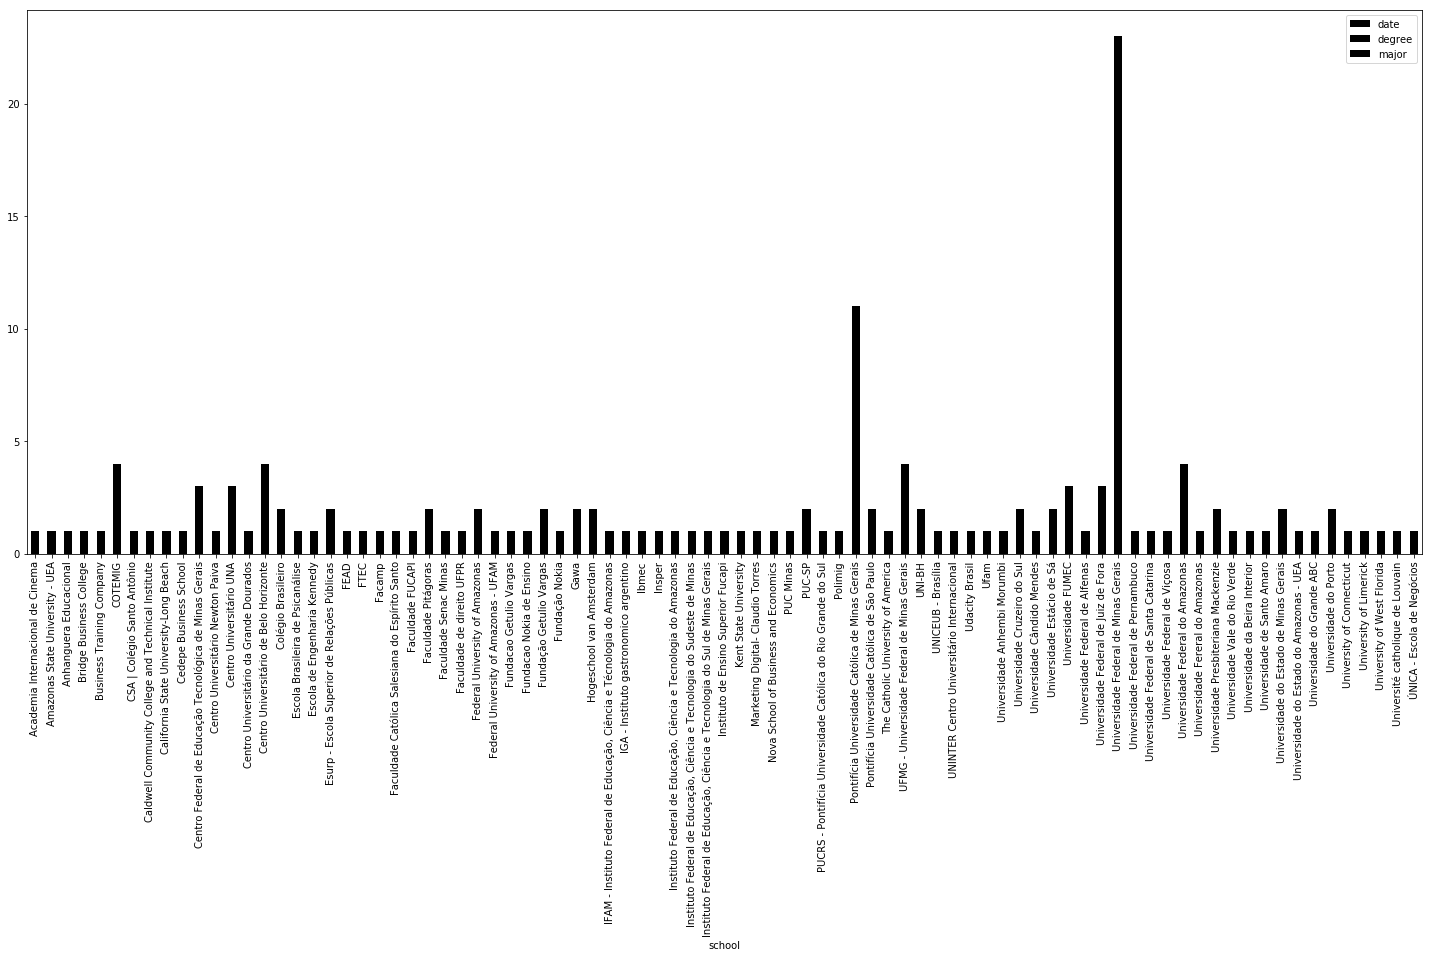

In [234]:
educationPerfis.groupby('school').count().plot(kind='bar', color='black', figsize=(25,10))

In [236]:
#Major
educationPerfis.groupby('major').count()

,date,degree,school
major,,,
Administração,1,1,1
Administração de Empresas,6,6,6
Análise Financeira,1,1,1
Business,2,2,2
Business Administration,1,1,1
"Business Administration and Management, General",1,1,1
Business Management,1,1,1
Business and SAP,1,1,1
Business e Marketing,1,1,1


# Experiences

In [254]:
#Perfil Experiences

#Função para concatenação das listas
def concatenaExperiences(listas):
    listasExperiences = []
    for i in  range(len(listas)):
        #Concatenação
        listasExperiences = listasExperiences + listas[i]
    return listasExperiences

#Chamada da Função 
experiencesPerfis = pd.DataFrame.from_dict(concatenaExperiences(dfPerfis.experiences))

#Visualização da tabela Experiences
#Visualizando apenas as 5 primeiras linhas (.head())
experiencesPerfis.head()


,company,date,location,position
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte e Região, Brasil",CEO and Founder
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


# Tratamento dos Dados

In [257]:
#Após concatenação dos dados observou-se que algumas informações eram iguais porém com a escrita diferente, sendo necessário
#normalizá-las para não influenciarem na contagem da análise
experiencesPerfis = experiencesPerfis.replace('Belo Horizonte/MG','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('belo horizonte','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Belo Horizonte, Minas Gerais','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('belo Horizonte','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Belo Horizonte Area, Brazil','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Belo Horizonte','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Belo Horizonte e Região,Brasil e Região,Brasil','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('BrasilBrasil e Região,Brasil e Região, Brasil','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('BrasilBrasil e Região,Brasil e Região,Brasil','Belo Horizonte, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('São Paulo Area, Brazil','São Paulo, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('São Paulo, São Paulo','São Paulo, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('São Paulo','São Paulo, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('São Paulo e Região, Brasil e Região, Brasil','São Paulo, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('São Paulo e Região, Brasil, Brasil','São Paulo, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Manaus Area, Brazil','Manaus e Região, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Manaus','Manaus e Região, Brasil',regex=True)
experiencesPerfis = experiencesPerfis.replace('Manaus e Região, Brasil e Região, Brasil','Manaus, Brasil',regex=True)

#Valores nulos
experiencesPerfis = experiencesPerfis.dropna()

experiencesPerfis.head()

,company,date,location,position
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte, Brasil, Brasil, Brasil e Regiã...",CEO and Founder
7,Any Company,out de 2015 – o momento,"Belo Horizonte, Brasil, Brasil, Brasil e Regiã...",Investor and Board Member
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur
9,Any Company,set de 2009 – jan de 2011,"São Paulo, Brasil, Brasil, Brasil e Região, Br...",Founder and Sales Director
10,Trojan Technologies,jul de 2017 – o momento,"Belo Horizonte, Brasil, Brasil, Brasil e Regiã...",Product Manager


# Resultados Experiences

In [241]:
#Position
experiencesPerfis.groupby('position').count()


,company,date,location
position,,,
Account Executive,1,1,1
Account Manager,1,1,1
Administrador de clínica médica,1,1,1
Advisor to the Presidency,1,1,1
Agente Censitário Municipal,1,1,1
Agente Comercial,1,1,1
Analista Comercial,1,1,1
Analista Desenvolvedor,1,1,1
Analista Financeiro,1,1,1


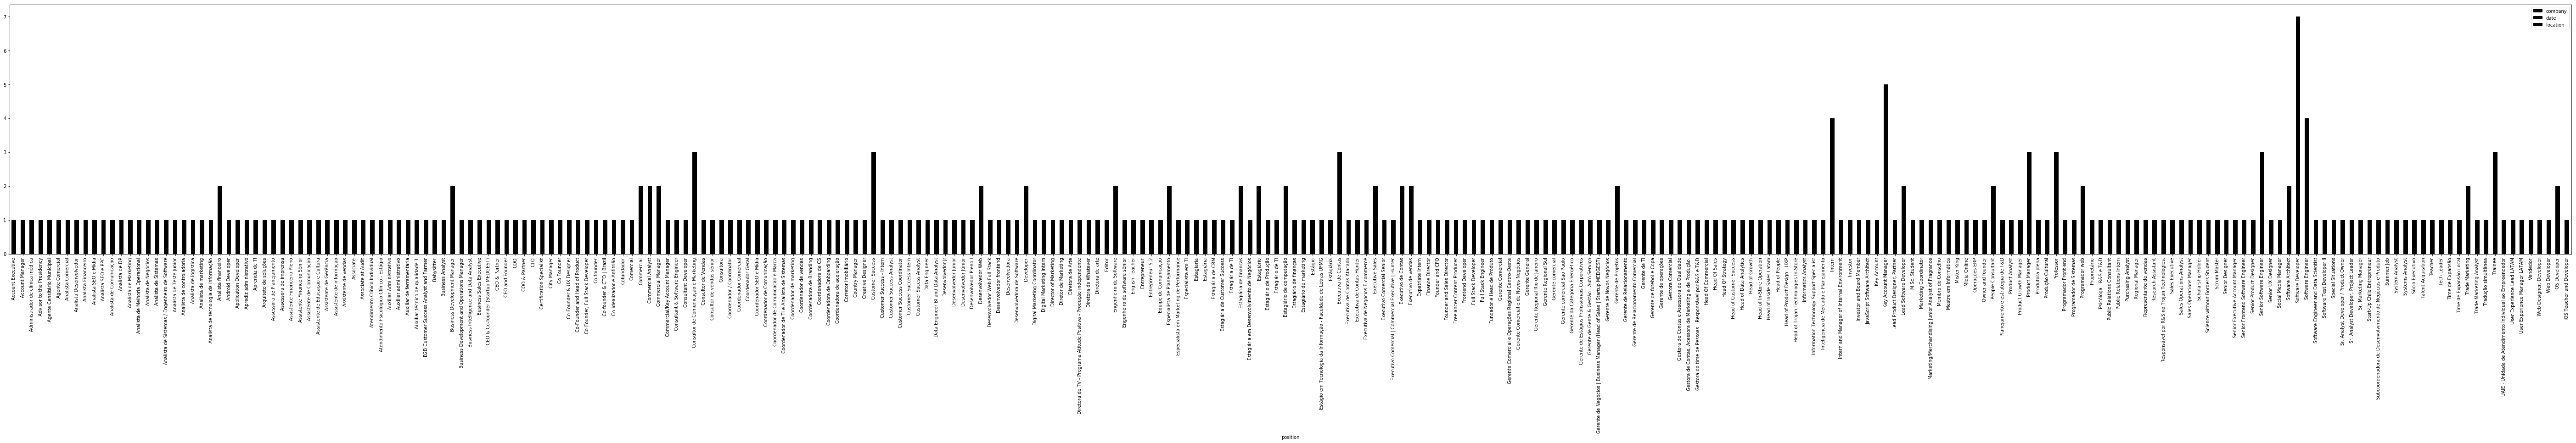

In [244]:
#Experiences Perfis by Position
#Gráfico não ficou bom
experiencesPerfis.groupby('position').count().plot(kind='bar', color='black', figsize=(100,10))

In [296]:
#location
experiencesPerfis.groupby('location').count()

,company,date,position
location,,,
,1,1,1
"1 Bootcamp Gama Academy - Belo Horizonte, Brasil, Brasil, Brasil",1,1,1
"Alphaville-Barueri,SP",1,1,1
Alphaville-Barueri-SP,1,1,1
Alvorada,1,1,1
"Amesterdã e Região, Holanda",1,1,1
"Aulnoye-Aymeries, France",1,1,1
"Av. Brasil, Nº 2971 - Compensa - Cep – 69036-110",1,1,1
"Av. Efigênio Salles, 1155 - Aleixo, Manaus e Região, Brasil, Brasil - AM, 69057-050",1,1,1


# Gender

In [258]:
#Perfil Gender

genderPerfis = dfPerfis.gender
#Visualização da tabela Gender
#genderPerfis
genderPerfis.head()


0      MALE
1    FEMALE
2      MALE
3    FEMALE
4      MALE
Name: gender, dtype: object

# Tratamento dos Dados


In [260]:
#Valores nulos
genderPerfis = genderPerfis.dropna(how='all')

#Visualização da tabela Gender
#Visualizando apenas as 5 primeiras linhas (.head())
#genderPerfis.head()


# Resultados Gender

In [245]:
#Contagem dos valores 
genderPerfis.value_counts()
#genderPerfis.describe()

MALE      65
FEMALE    39
NA         7
Name: gender, dtype: int64

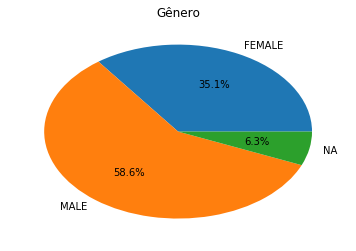

In [183]:
descricao = ['FEMALE', 'MALE', 'NA']

value_countsPerfis = [39,65,7]

plt.pie(value_countsPerfis, labels=descricao, autopct='%1.1f%%')
plt.title('Gênero')
plt.show()


# Languages

In [197]:
#Perfil Languages

#Função para Concatencação das listas
def concatenaLanguages(listas):
    listasLanguages = []
    for i in (listas):
        if not type(i) is float:
            #A concatenação só é realizada para listas que não são do tipo "float", para essa tabela, foi necessário realizar uma 
            #condição para verificação.
            for x in i:
                listasLanguages.append(x)
    return listasLanguages
                       
#Chamada da Função
languagesPerfis = pd.DataFrame(concatenaLanguages(dfPerfis.languages))

#Visualização da tabela Languages
#languagesPerfis

#Visualização da tabela Languages
#Visualizando apenas as 5 primeiras linhas (.head())
#languagesPerfis.head()



# Tratamento dos Dados

In [ ]:
#Após concatenação dos dados observou-se que a coluna name possuia o texto "Idioma\n" antes da informação, 
#confundindo-se então a visualização. Sendo assim, utilizou-se o 'replace' para substituir a frase ('').
languagesPerfis = languagesPerfis.replace('Idioma\n','',regex=True)


#Após concatenação dos dados observou-se que algumas informações eram iguais porém com a escrita diferente, sendo necessário
#normalizá-las para não influenciarem na contagem da análise
languagesPerfis = languagesPerfis.replace('Inglês - Intermediário - em curso','Inglês',regex=True)
languagesPerfis = languagesPerfis.replace('Inglês - Certificação TOEIC','Inglês',regex=True)
languagesPerfis = languagesPerfis.replace('Inglês médio ','Inglês',regex=True)
languagesPerfis = languagesPerfis.replace('Inglês(1100-1500)','Inglês',regex=True)#Não funcionou
languagesPerfis = languagesPerfis.replace('English','Inglês',regex=True)

languagesPerfis = languagesPerfis.replace('Portuguese','Português',regex=True)
languagesPerfis = languagesPerfis.replace('Portugais','Português',regex=True)

languagesPerfis = languagesPerfis.replace('Spanish','Espanhol',regex=True)


languagesPerfis = languagesPerfis.replace('French','Francês',regex=True)
languagesPerfis = languagesPerfis.replace('Français','Francês',regex=True)

languagesPerfis = languagesPerfis.replace('Italian','Italiano',regex=True)
languagesPerfis = languagesPerfis.replace('Italianoo','Italiano',regex=True)


#Valores nulos
languagesPerfis = languagesPerfis.dropna()


# Resultados Languages

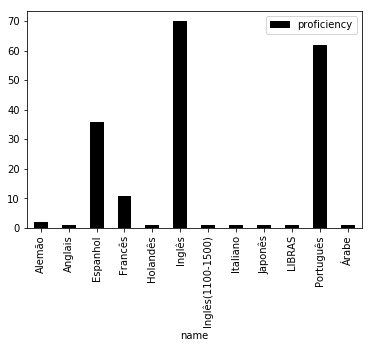

In [205]:
#Languages
languagesPerfis.groupby('name').count().plot(kind='bar', color='black')


In [200]:
#Foi realizado o agrupamento(groupby) dos valores a fim apresentar todas as linguagens preenchidas
languagesPerfis.groupby('name').count()

,proficiency
name,
Alemão,2
Anglais,1
Espanhol,36
Francês,11
Holandês,1
Inglês,70
Inglês(1100-1500),1
Italiano,1
Japonês,1


In [178]:
#Analisando as 3 linguas mais faladas


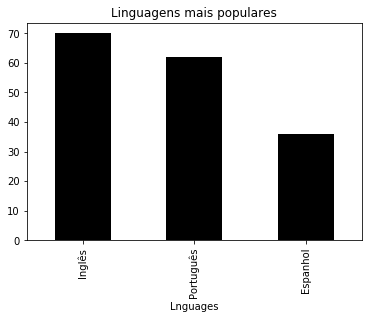

In [188]:
#Gráfico referente as 3 linguas mais faladas
languagesPerfis['name'].value_counts().head(3).plot(kind='bar', color='black')
plt.title('Linguagens mais populares')
plt.xlabel('Lnguages')
plt.show()

In [179]:
#Nível de Proficiency em geral das linguagens
languagesPerfis.groupby('proficiency').count()

,name
proficiency,
Fluente ou nativo,78
Nível avançado,42
Nível básico,16
Nível básico a intermediário,26
Nível intermediário,26


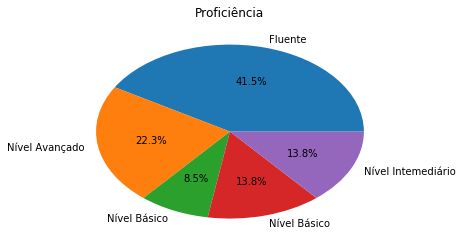

In [294]:
descricao = ['Fluente', 'Nível Avançado', 'Nível Básico', 'Nível Básico', 'Nível Intemediário']

value_countsProficiency = [78,42,16,26,26]

plt.pie(value_countsProficiency, labels=descricao, autopct='%1.1f%%')
plt.title('Proficiência')
plt.show()

# Skill

In [293]:
#Perfil Skill

#Função para Concatencação das listas
def concatenaSkill(listas):
    listasSkills = []
    for i in (listas):
        #A concatenação só é realizada para listas que não são do tipo "float", para essa tabela, foi necessário realizar uma 
        #condição para verificação.
        if not type(i) is float:
            for x in i:
                listasSkills.append(x)
    return listasSkills
         
#Chamada da Função
skillsPerfis = pd.DataFrame(concatenaSkill(dfPerfis.skills))

#Visualização da tabela Skills
#Visualizando apenas as 5 primeiras linhas (.head())
skillsPerfis.head()

,endorsement_count,name
0,+ de 99,Empresas startups
1,NaN,NaN
2,NaN,NaN
3,+ de 99,Empreendedorismo
4,NaN,NaN


# Tratamento dos Dados

In [291]:
#Valores nulos
skillsPerfis = skillsPerfis.dropna()

skillsPerfis.head()

#Após concatenação dos dados observou-se que algumas informações eram iguais porém com a escrita diferente, sendo necessário
#normalizá-las para não influenciarem na contagem da análise
skillsPerfis = skillsPerfis.replace('Empresas startups','Startup',regex=True)
skillsPerfis = skillsPerfis.replace('Start-ups','Startup',regex=True)
skillsPerfis = skillsPerfis.replace('Entrepreneurship','Empreendedorismo',regex=True)

skillsPerfis.head()

,endorsement_count,name
0,+ de 99,Startup
3,+ de 99,Empreendedorismo
6,97,Startup
9,73,Empreendedorismo
10,75,New Business Development


# Resultados Skills

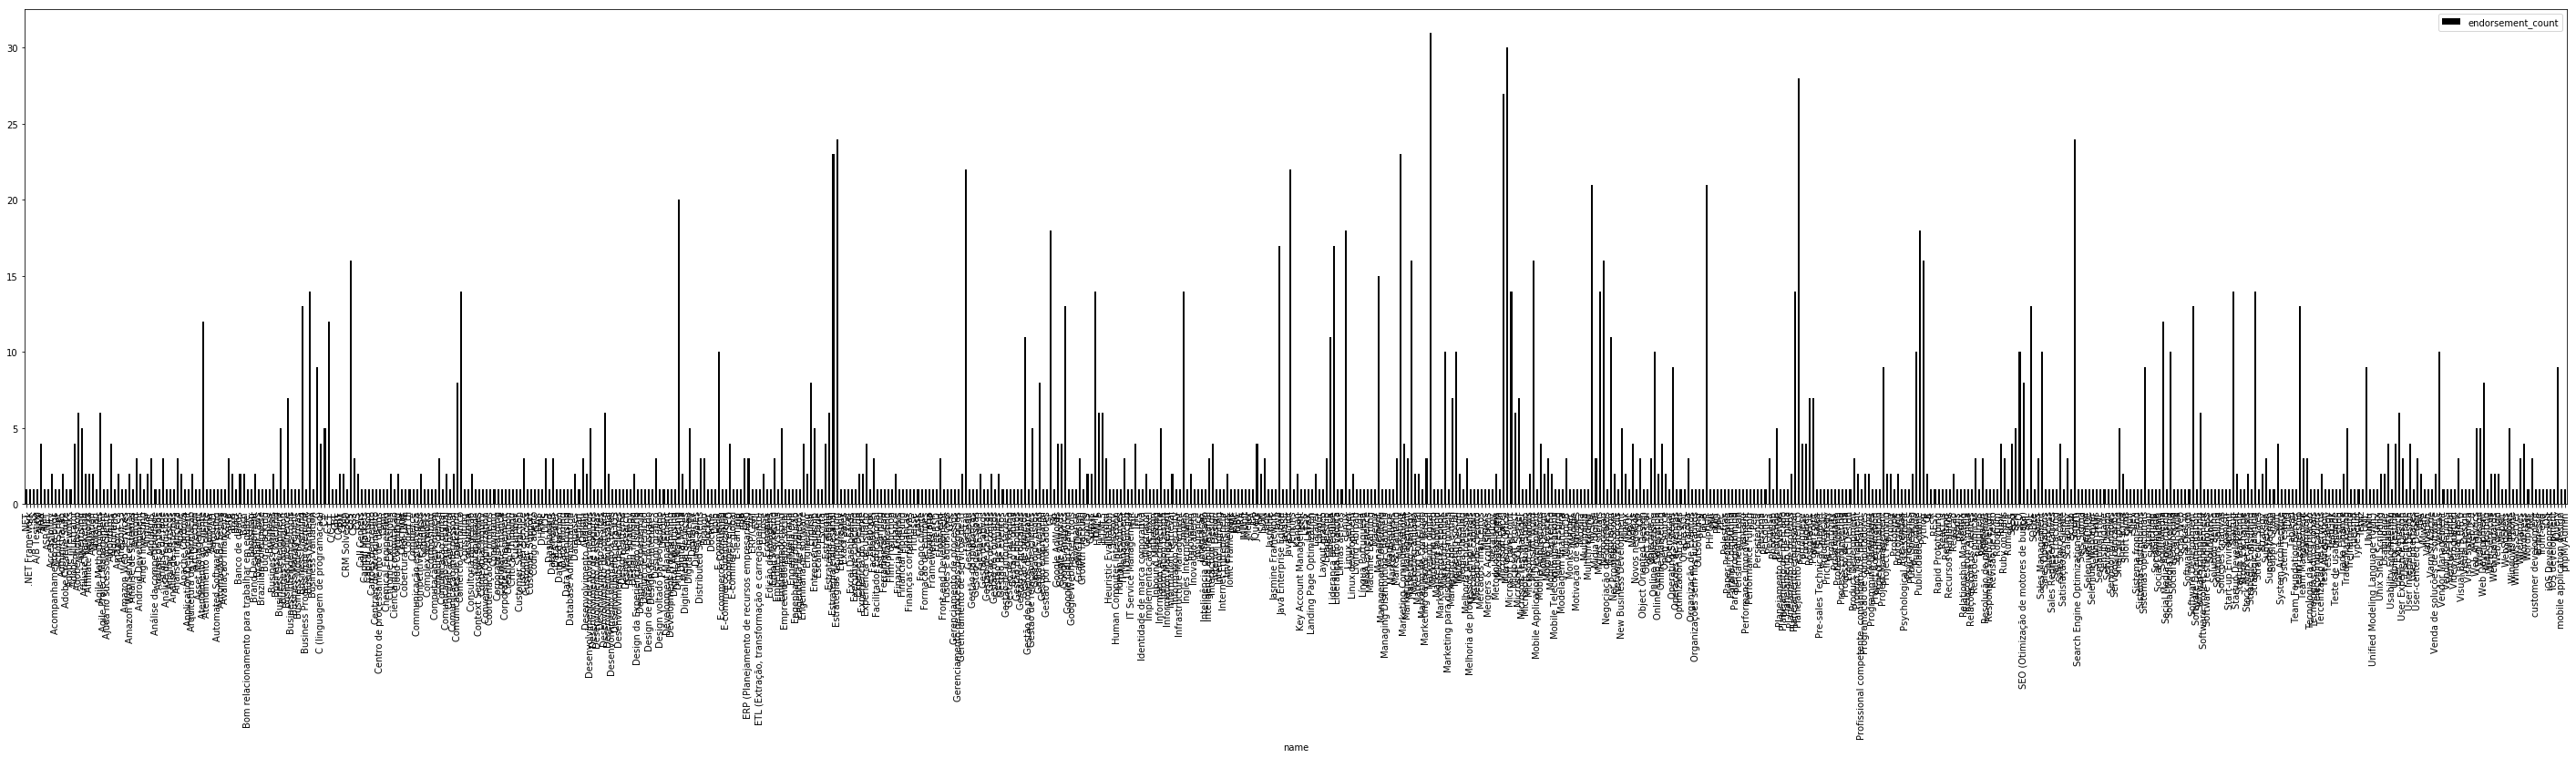

In [290]:
skillsPerfis.head()

skillsPerfis.groupby('name').count().plot(kind='bar', color='black', figsize=(50,10))

# Matriz de Similaridade

In [73]:
#Importação das bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Base é a matriz de similaridade entre os cursos
matrizSimilaridade = "matriz_similaridade_cursos.csv"

#Leitura do arquivo
dfMatriz = pd.read_csv(matrizSimilaridade)

#dfMatriz.head()

,;Administração;Agronegócio;Agronomia;Arquitetura e Urbanismo;Bioquímica;Ciência da Computação;Ciência e Tecnologia de Laticínios;Ciências Biológicas ;Ciências Contábeis;Ciências Econômicas;Ciências Sociais ;Comunicação Social ;Cooperativismo;Dança ;Direito;Economia Doméstica ;Educação Física ;Educação Infantil ;Educação do Campo ;Enfermagem;Engenharia Agrícola e Ambiental;Engenharia Ambiental;Engenharia Civil;Engenharia Elétrica;Engenharia Florestal;Engenharia Mecânica;Engenharia Química;Engenharia de Agrimensura e Cartográfica;Engenharia de Alimentos;Engenharia de Produção;Física ;Geografia ;História ;Letras ;Matemática ;Medicina;Medicina Veterinária;Nutrição;Pedagogia ;Química ;Secretariado Executivo Trilíngue;Serviço Social;Zootecnia
0,Administração;1.0;0.6189302980662862;0.5598826...
1,Agronegócio;0.6189302980662862;1.0;0.613371454...
2,Agronomia;0.5598826998711306;0.613371454570889...
3,Arquitetura e Urbanismo;0.5268985220739953;0.5...
4,Bioquímica;0.5506685865205;0.5411163655073897;...


In [279]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

linha = ['Administração','Agronegócio','Agronomia','Arquitetura e Urbanismo','Bioquímica', 'Ciência da Computação','Ciência e Tecnologia de Laticínios'
'Ciências Biológicas', 'Ciências Contábeis', 'Ciências Econômicas', 'Ciências Sociais','Comunicação Social','Cooperativismo',
'Dança','Direito','Economia Domestica', 'Educação Física','Educação do Campo', 'Enfermagem', 'Engenharia Agrícola e Ambiental', 
'Engenharia Ambiental', 'Engenharia Civil', 'Engenharia Elétrica', 'Engenharia MecÂnica','Engenharia Química', 'Engenharia de Agrimensura e Cartográfica',
'Engenharia de Alimentos', 'Engenharia de Produção', 'Física', 'Geografia','História', 'Letras', 'Matemática', 'Medicina', 
'Medicina Veterinária', 'Nutrição', 'Pedagogia','Química', 'Secretariado Executivo Trilíngue', 'Serviço Social', 'Zootecnia']

matrizSimilaridade = "matriz_similaridade_cursos.csv"

#Leitura do arquivo
dfMatriz = pd.read_csv(matrizSimilaridade)

df = DataFrame(dfMatriz, index=linha, columns=linha)

df = pd.DataFrame(dfMatriz)

sns.heatmap(dfMatriz, annot=True)

# Resultados

Foi realizado a análise de cada tabela separadamente, a fim de conhecer suas informações e assim, ser possibilitando a junção dos dados formando o melhor perfil para a Trojan Technologies SA baseado em sua base de dados. Foi realizado a contagem de cada habilidade, linguagem e diferencial  de cada tabela, apresentando assim as características mais populares dos profissionais.

# Conclusão

Durante o desenvolvimento do trabalho tive dificuldades quanto a leitura do arquivo .csv, quanto a leitura de uma lista dentro de outra lista e realizar a concatenação e a plotagem e análise da matriz de similaridade. Por meio do trabalho foi possível concluir que o perfil mais comum são de homens, a lingua mais popular é a Inglesa e o nivel fluente de proeficiência. Foi possível observar que a maior parte dos profissionais estudaram em universidades cituadas na cidade de Belo Horizonte.

# Referências

In [ ]:
Para realização do trabalho não foram utilizadas fontes aldicionais. (Apenas as bases disponibilizadas)